# Mini Assignment 9 - USA Exploration
## **Author:** Sherry Wang

## **Date** 26th of Oct ( text edited on 31st of Oct)


---
## **Introduction**
This notebook will explore further with the aim of answering in our driving question how deadly is COVID and finding ways to calculate and present uncertainties. For the purpose of this notebook we will focus on United States only and conduct Exploratory data Analysis to explore existing trends and correlations as well as different factors of uncertainties associated with the data.

**Section 1:**

This file will be merging two sources of data from 'Our world data' and 'John Hopkins data', this is because we would like to conduct EDA and create visualisations using the number of recovered cases which is only available in John Hopkin's data set. 

After merging the two data sets, i'll subset the data for United States only as this is agreed by the team that i'll be conducting analysis on US only. 
Then the following graphs will be presented graphs for 
1. New cases each day
2. New deaths each day
3. New recovery each day
4. New Testing each day

Followed by calculating the CFR and plot the death rate for each day on a time series plot for visualisation.
CFR is calculated using this formula:

>$CFR=\frac{Number of deaths of disease}{Number of confirmed}* 100$

Following some analysis on new found data by sex/age will be conducted for visualisations.

**Section 2:** (updated on 24th of Oct)

Infection Fatility Rate will be calculated for United States and the Confidence Interval will be calculated too.

>$IFR=\frac{Number of deaths }{Number of Infected}* 100$



### Section 1
First we will import all the libraies for the analysis and install orca package so that the plotly graphs can display properly when downloaded.


In [170]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime
from datetime import *
import plotly.io as pio
pio.renderers.default = "png"
from google.colab import files
import io

In [171]:
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

/usr/local/bin/orca: Text file busy
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgtk2.0-0 is already the newest version (2.24.32-1ubuntu1).
libgconf-2-4 is already the newest version (3.2.6-4ubuntu1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.7).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


Read in 'Our World Data' as df and read in recovery data from John Hopkins as jh_recovered and view the dataset.

In [172]:
df=pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
jh_recovered=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


In [173]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


### Data Engineering

Change the date values into date format for data cleaning and preparation of merging the two data sets. Repeat this for both data sets.

In [174]:
df['date']=pd.to_datetime(df['date'], errors='ignore')


for the John Hopkin's data set we need to transform the dataframe from wide to long format using the melt function so that the dataframe is consistent.

In [175]:
jh_recovered2=jh_recovered.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name = 'date', value_name = 'recovered')


In [176]:
jh_recovered2['date']=pd.to_datetime(jh_recovered2['date'], errors='ignore')


Before we can merge, as the first dataset cummulates all data for each country, we need to remove the "States" in the Johns Hopkins dataset and sum the recovery cases so we can obtain the recovery cases for an entire country and not have it split up into Provinces/States.


In [177]:
jh_recovered2=jh_recovered2.drop(["Province/State","Lat","Long"], axis=1)


In [178]:
jh_recovered2_grouped=jh_recovered2.groupby(["Country/Region","date"]).sum()


The country names are inconsistent between the 2 files for United States hence we will replace the names in the john hopkins file to match the other dataset.

In [179]:
jh_recovered2['Country/Region'] = jh_recovered2['Country/Region'].replace(['US'],'United States')

Merge the two data sets based on the 'location' & 'date' variables in the 'Our World data' and 'Country/Region' & 'date' variables in the John Hopkins data.

In [180]:
merge1=df.merge(jh_recovered2, how='inner', left_on=["location", "date"], right_on=["Country/Region","date"])

In [181]:
merge1.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Country/Region,recovered
0,AFG,Asia,Afghanistan,2020-01-22,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,Afghanistan,0
1,AFG,Asia,Afghanistan,2020-01-23,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,Afghanistan,0
2,AFG,Asia,Afghanistan,2020-01-24,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,Afghanistan,0
3,AFG,Asia,Afghanistan,2020-01-25,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,Afghanistan,0
4,AFG,Asia,Afghanistan,2020-01-26,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498,Afghanistan,0


From the above output, we can see the merge was successful, a new column for recovered cases is added at the end of the dataframe.

Subset the dataset with location/country code being 'USA' since this is the country I was assigned to conduct EDA and investigate in.

In [182]:
us=merge1.loc[merge1['iso_code'] == "USA"]

Add new column called 'new_recover' that calculates the daily cases from the 'recovered' variable that is cummulated values, so that each value in 'new_recover' corresponds to a daily value.

In [183]:
us['new_recover'] = us['recovered'].diff()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Note that in this file, I did not check for missing values since the same process have been conducted in week 8's checkpoint 1 file as the same data has been used.**

For the column 'date' we need to change it into dateformat.

In [184]:
us['date']=pd.to_datetime(us['date'], errors='ignore').dt.date

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### EDA
We will explore different variables and search for existing trends and correlations between variables.

The following is the graph for daily new confirmed cases by dates and the smoothed version.


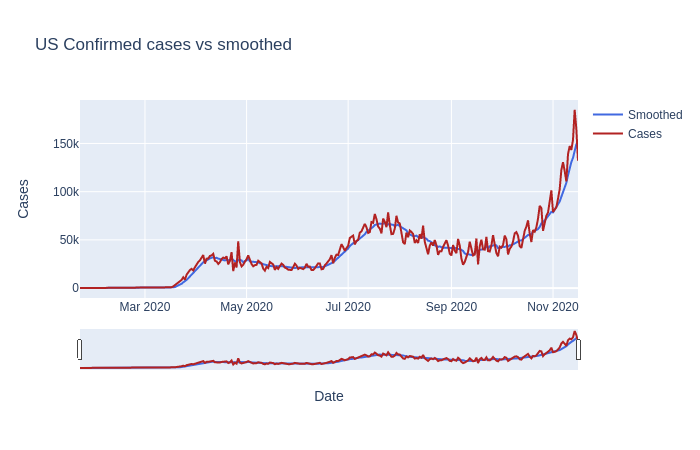

In [185]:


fig1 = go.Figure()
# Create and style traces

fig1.add_trace(go.Scatter(x=us['date'], y=us['new_cases_smoothed'], name = 'Smoothed',
                         line=dict(color='royalblue', width=2)))


fig1.add_trace(go.Scatter(x=us['date'], y=us['new_cases'], name = 'Cases',
                         line=dict(color='firebrick', width=2)))

# Edit the layout
fig1.update_layout(title='US Confirmed cases vs smoothed',
                   xaxis_title='Date',
                   yaxis_title='Cases')

fig1.update_xaxes(rangeslider_visible=True)
#fig1.show()
fig1.show(renderer="png")

From the graph above, we can observe that the overall trend of confirmed cases in US has been increasing. There are 3 peaks across the timeline, in April, August and  reaching a new peak in October.

#### New deaths by dates

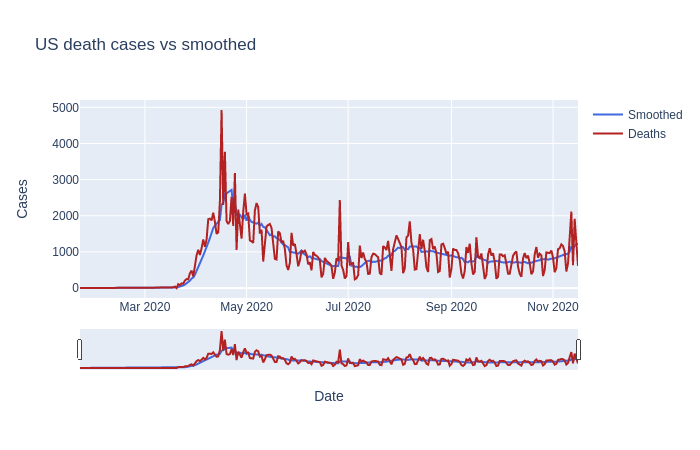

In [186]:

fig2 = go.Figure()
# Create and style traces

fig2.add_trace(go.Scatter(x=us['date'], y=us['new_deaths_smoothed'], name = 'Smoothed',
                         line=dict(color='royalblue', width=2)))


fig2.add_trace(go.Scatter(x=us['date'], y=us['new_deaths'], name = 'Deaths',
                         line=dict(color='firebrick', width=2)))

# Edit the layout
fig2.update_layout(title='US death cases vs smoothed',
                   xaxis_title='Date',
                   yaxis_title='Cases')

fig2.update_xaxes(rangeslider_visible=True)
fig2.show()

The number of death cases have peaked in April-May and slowly declined since. Comparing the smoothed death cases to new daily death cases we can see that the peak at April are less dramatic.

#### New recovered cases by dates

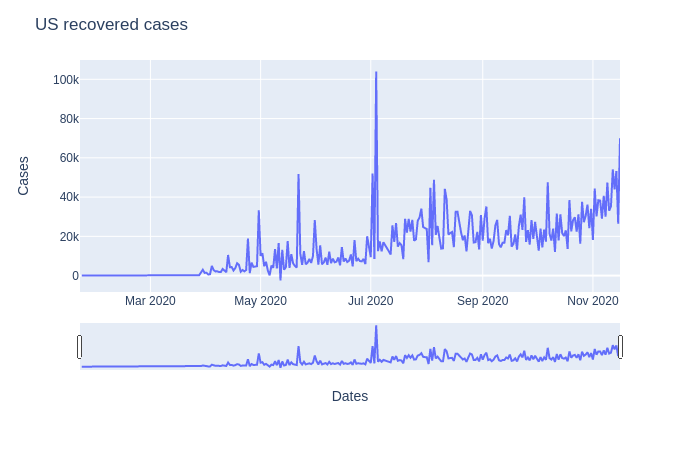

In [187]:
fig3 = px.line(us, x='date', y="new_recover")
fig3.update_xaxes(rangeslider_visible=True)
fig3.update_layout(title='US recovered cases',
                   xaxis_title='Dates',
                   yaxis_title='Cases')
fig3.show()



Notice the above new recovered cases by date has one negative value due to corrections being made in the data set. Notice there are a few spikes in the graph, which are potentially 

#### New test cases by dates

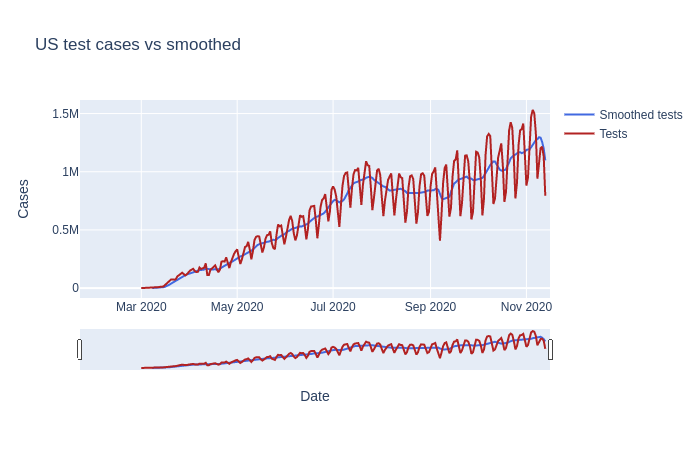

In [188]:
fig4 = go.Figure()
# Create and style traces

fig4.add_trace(go.Scatter(x=us['date'], y=us['new_tests_smoothed'], name = 'Smoothed tests',
                         line=dict(color='royalblue', width=2)))


fig4.add_trace(go.Scatter(x=us['date'], y=us['new_tests'], name = 'Tests',
                         line=dict(color='firebrick', width=2)))

# Edit the layout
fig4.update_layout(title='US test cases vs smoothed',
                   xaxis_title='Date',
                   yaxis_title='Cases')

fig4.update_xaxes(rangeslider_visible=True)
fig4.show()

There is a clear increasing trend for the number of Covid tests been taken.

Graphing all 4 variables together in one time series graph for comparison.

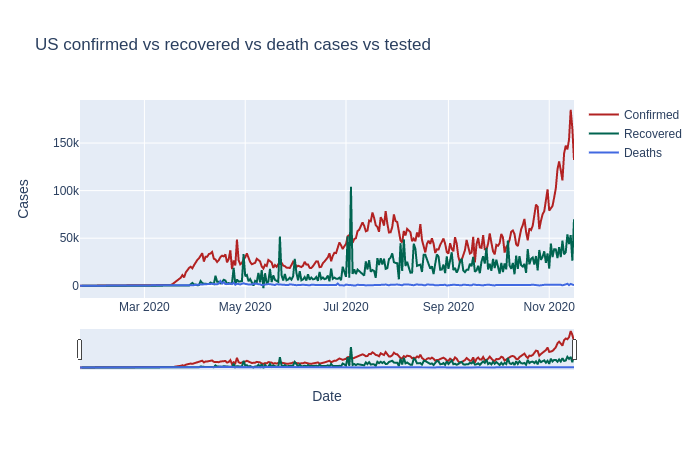

In [189]:

fig5 = go.Figure()
# Create and style traces
fig5.add_trace(go.Scatter(x=us['date'], y=us['new_cases'], name='Confirmed',
                         line=dict(color='firebrick', width=2)))
fig5.add_trace(go.Scatter(x=us['date'], y=us['new_recover'], name = 'Recovered',
                         line=dict(color='rgb(0,100,80)', width=2)))
fig5.add_trace(go.Scatter(x=us['date'], y=us['new_deaths'], name = 'Deaths',
                         line=dict(color='royalblue', width=2)))
#REMOVED TEST BECAUSE IT MAKES THE OTHER LINES HARD TO SEE
'''
fig5.add_trace(go.Scatter(x=us['date'], y=us['new_tests'], name = 'Tests',
                         line=dict(color='goldenrod', width=4)))
'''
# Edit the layout
fig5.update_layout(title='US confirmed vs recovered vs death cases vs tested',
                   xaxis_title='Date',
                   yaxis_title='Cases')

fig5.update_xaxes(rangeslider_visible=True)
fig5.show()

Now we will calculate the death rate using CFR method as mentioned above for everyday and graph it on a time series plot. We will calculate and graph both the smoothed and unsmoothed CFR.

In [190]:
us['CFR']=(us['new_deaths']/(us['new_cases']))
us['total_CFR']=(us['total_deaths']/(us['total_cases']))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



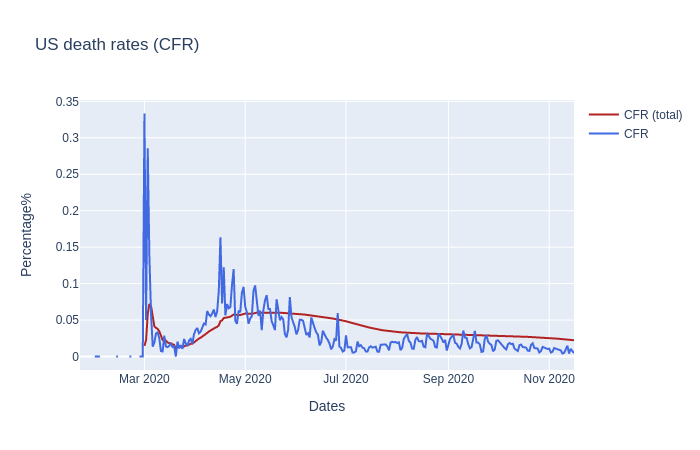

In [191]:
fig6 = go.Figure()
# Create and style traces
fig6.add_trace(go.Scatter(x=us['date'], y=us['total_CFR'], name='CFR (total)',
                         line=dict(color='firebrick', width=2)))
fig6.add_trace(go.Scatter(x=us['date'], y=us['CFR'], name='CFR',
                         line=dict(color='royalblue', width=2)))
fig6.update_layout(title='US death rates (CFR)',
                   xaxis_title='Dates',
                   yaxis_title='Percentage%')
fig6.show()




In the graph, we can see that the smoothed CFR can see the trends much more clearer and have reduced the outliers shown by the extreme spikes, which may have been corrections of data. We can also visualise that left hand side has a much more severe death rate than the right hand side. Right hand side seems to be stablising. Hence we will calculated 2 separate death rates to compare how different are the 2 values.


In [192]:
us['total_CFR'].describe()

count    261.000000
mean       0.038046
std        0.014188
min        0.010526
25%        0.027893
50%        0.032498
75%        0.053088
max        0.072000
Name: total_CFR, dtype: float64

From the times series plot and the statistics description we can observe that the inital few months of death rate is very high. From March it surged drastically then steep drop when approaching April. But soon the CFR rises in April again after the drop, when reaching May it has been slowly declining and stablising in July till October.





Below we will calculate the CFR for United States using the formula addressed above and it will be rounded to 2 significant figures.

In [193]:
#Overall death rate & 2 stages death rate
CFR_overall=us['total_deaths'].max()/us['total_cases'].max()*100

In [194]:
round(CFR_overall,1)

2.2

Now calculate the death rate in 2 parts, I've split it into CFR 1 on the left hand side and CFR 2 on the right, the two stages were split with the date 2020/07/01. Define the death rate for stage 1 as 'CFR1'.

In [195]:
tot_death1=us[['new_deaths']].where(us['date'] < date(2020,7,1), 0).sum(axis=0).max()
tot_confirmed1=us[['new_cases']].where(us['date'] < date(2020,7,1), 0).sum(axis=0).max()

CFR1=tot_death1/(tot_confirmed1)*100

In [196]:
#significant figure kept to 2, consistent throughout the notebook
round(CFR1,1)


4.9

Now repeating the above process to calculated the second CFR rate.

In [197]:
#for section 2 death rate
tot_death2=us[['new_deaths']].where(us['date'] > date(2020,5,19), 0).sum(axis=0).max()
tot_confirmed2=us[['new_cases']].where(us['date'] > date(2020,5,19), 0).sum(axis=0).max()

CFR2=tot_death1/(tot_confirmed2)*100

In [198]:
round(CFR2,1)

1.3

And print out the total CFR over the whole date range to compare with the 2 values obtained previously.

In [199]:
round(CFR_overall,1)

2.2

In [200]:
from IPython.display import Markdown as md
md("By comparing the 3 different death rates we can clearly see the big differences between them. CFR1 is exceptionally high with a death rate of{}, but in stage 2 we can see the death rate declines to {}%. And if we calculate the overall ongoing CFR rate it is around {}%.".format(round(CFR1,1),round(CFR2,1),round(CFR_overall,1)))

By comparing the 3 different death rates we can clearly see the big differences between them. CFR1 is exceptionally high with a death rate of4.9, but in stage 2 we can see the death rate declines to 1.3%. And if we calculate the overall ongoing CFR rate it is around 2.2%.

# New data set- exploration within USA
This following dataset is to investigate further into the factors that influence death rates in USA, including sex, age.

First we import the data as per below.

In [201]:
sex_data=pd.read_csv('https://raw.github.sydney.edu.au/swan9801/R13B-Group4-COVID/master/Process%20Notebooks/Checkpoint%202/Covid_sex.csv?token=AAABDAQFI72YA35FCGTHPJS7XT2TU')

We're only interested in USA, hence subsetting the data for USA

In [202]:
usa=sex_data[sex_data['Country']=='USA']

In [203]:
usa

,Country code,Country,Case & death data by sex?,Cases date,Cases where sex-disaggregated data is available,Cases (% male),Cases (% female),Deaths date,Deaths where sex-disaggregated data is available,Deaths (% male),Deaths (% female),Deaths in confirmed cases date,Proportion of deaths in confirmed cases (male),Proportion of deaths in confirmed cases (female),Proportion of deaths in confirmed cases (Male:female ratio),Source
172,US,USA,Yes,2020/10/12,5706415.0,48.3%,51.7%,2020/10/03,198804.0,54.06%,45.94%,2020/09/30,4.14%,3.29%,1.26,https://www.cdc.gov/covid-data-tracker/index.h...


Using the new data we will plot a bar graph to assit in visualisation of the distribution of confirmed cases that is split by sex. Note that the number of cases that are disaggregated by sex are not complete.

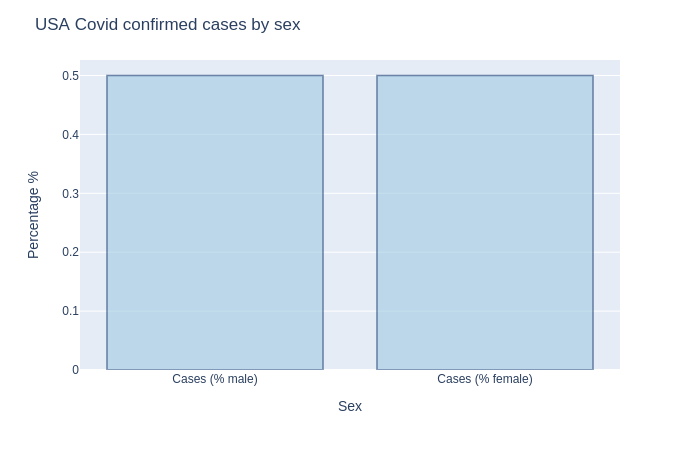

In [204]:

fig = px.histogram(usa, x=["Cases (% male)","Cases (% female)"], histnorm='probability density')

# Customize aspect
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='USA Covid confirmed cases by sex',
                  xaxis_title='Sex',
                   yaxis_title='Percentage %')

fig.show()

Now we will create a similar view, but for the number of deaths in USA split by sex.


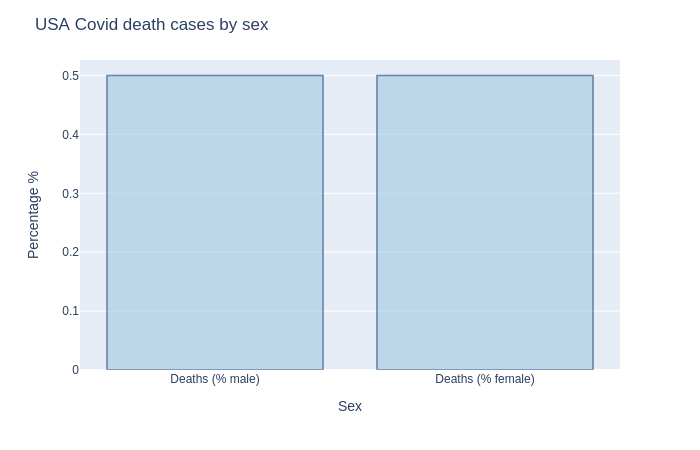

In [205]:
fig = px.histogram(usa, x=["Deaths (% male)","Deaths (% female)"], histnorm='probability density')

# Customize aspect
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='USA Covid death cases by sex',
                  xaxis_title='Sex',
                   yaxis_title='Percentage %')

fig.show()

From the 2 box plots above, we can clearly see that both the confirmed cases and death cases in USA doent have a huge difference between each sex.

# Section 2: Infection Fatility Rates (updated on 24th of Oct)

After some researches and team discussion, we reached to a conclusion that Infection Fatility Rates (IFR) will be the best to calculate the true severity of COVID which answeres the driving question- how deadly is COVID? 
CFR does not reflect the risk of death because when situations were there are people who have Covid but are not diagosed, the CFR will overestimate the true risk of death. Also in another situation when some people are currently sick and will die of the disease, but have not died yet, the CFR will underestimate the true risk of death. 
Therefore, we would like to estimate the number of true infection cases in order to determine how deadly or what's the risk of Covid.

Refer to the link for more information: https://ourworldindata.org/covid-mortality-risk

Here, we found a new dataset using 4 different models to calculated the estimated infection cases for each countries and we will import the data set and assign it to 'ifr'. 

In [206]:
ifr=pd.read_csv('https://raw.github.sydney.edu.au/swan9801/R13B-Group4-COVID/master/Process%20Notebooks/Checkpoint%202/Model%20Datasets/daily-new-estimated-infections-of-covid-19.csv?token=AAABDAWT346Q3F6YRMSRKXS7XT24O')

In [207]:
ifr.head()

,Entity,Code,Date,"Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)","Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned) Annotations","Daily new estimated infections of COVID-19 (ICL, mean)","Daily new estimated infections of COVID-19 (IHME, mean)","Daily new estimated infections of COVID-19 (YYG, mean)","Daily new estimated infections of COVID-19 (LSHTM, median)"
0,Afghanistan,AFG,2020-01-02,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2020-01-03,0.0,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,2020-01-04,0.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,2020-01-05,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,2020-01-06,0.0,NaN,NaN,NaN,NaN,NaN


Next we will subset the USA data only for analysis purpose.

In [208]:
usa_inf=ifr[ifr['Code']=='USA']

In [209]:
usa_inf.head()

,Entity,Code,Date,"Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)","Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned) Annotations","Daily new estimated infections of COVID-19 (ICL, mean)","Daily new estimated infections of COVID-19 (IHME, mean)","Daily new estimated infections of COVID-19 (YYG, mean)","Daily new estimated infections of COVID-19 (LSHTM, median)"
60591,United States,USA,2020-01-02,0.0,NaN,NaN,NaN,NaN,NaN
60592,United States,USA,2020-01-03,0.0,NaN,NaN,NaN,NaN,NaN
60593,United States,USA,2020-01-04,0.0,NaN,NaN,NaN,NaN,NaN
60594,United States,USA,2020-01-05,0.0,NaN,NaN,NaN,NaN,NaN
60595,United States,USA,2020-01-06,0.0,NaN,NaN,NaN,NaN,NaN


Graphing a visualisation of the 4 model's estimated infection cases for USA versus actual confirmed cases in US.

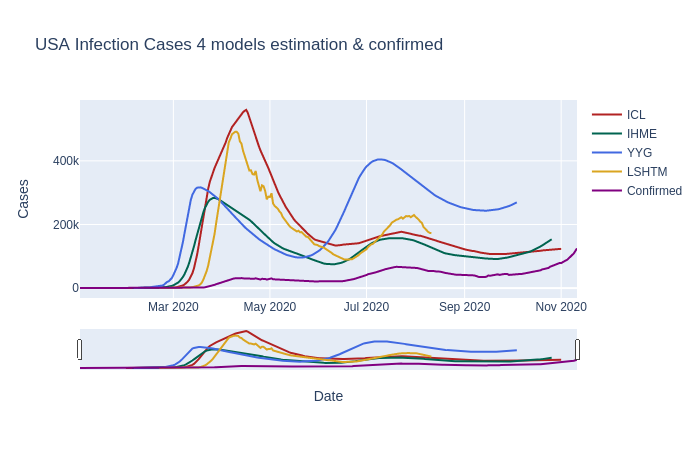

In [210]:
fig7 = go.Figure()
# Create and style traces
fig7.add_trace(go.Scatter(x=usa_inf['Date'], y=usa_inf['Daily new estimated infections of COVID-19 (ICL, mean)'], name='ICL',
                         line=dict(color='firebrick', width=2)))
fig7.add_trace(go.Scatter(x=usa_inf['Date'], y=usa_inf['Daily new estimated infections of COVID-19 (IHME, mean)'], name = 'IHME',
                         line=dict(color='rgb(0,100,80)', width=2)))
fig7.add_trace(go.Scatter(x=usa_inf['Date'], y=usa_inf['Daily new estimated infections of COVID-19 (YYG, mean)'], name = 'YYG',
                         line=dict(color='royalblue', width=2)))
fig7.add_trace(go.Scatter(x=usa_inf['Date'], y=usa_inf['Daily new estimated infections of COVID-19 (LSHTM, median)'], name = 'LSHTM',
                         line=dict(color='goldenrod', width=2)))
fig7.add_trace(go.Scatter(x=usa_inf['Date'], y=usa_inf['Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)'], name = 'Confirmed',
                         line=dict(color='purple', width=2)))
# Edit the layout
fig7.update_layout(title='USA Infection Cases 4 models estimation & confirmed',
                   xaxis_title='Date',
                   yaxis_title='Cases')

fig7.update_xaxes(rangeslider_visible=True)
fig7.show()

We can observe from the graph above that each model's estimation differs by quite alot, but all of them have substaintially higher values than the confirmed cases. Hence, it is quite important to choose a suitable model for the estimated infection cases.

Now calculate the IFR using the formula as stated in the beginning and compare the variances between the four models.

In [211]:
#2 significant figures to keep consistent and make comparisons between each
print('ICL model IFR is :',round(us['total_deaths'].max()/usa_inf['Daily new estimated infections of COVID-19 (ICL, mean)'].sum()*100,2))

ICL model IFR is : 0.52


In [212]:
print('IHME model IFR is :',round(us['total_deaths'].max()/usa_inf['Daily new estimated infections of COVID-19 (IHME, mean)'].sum()*100,2))

IHME model IFR is : 0.77


In [213]:
print('LSHTM model IFR is :',round(us['total_deaths'].max()/usa_inf['Daily new estimated infections of COVID-19 (LSHTM, median)'].sum()*100,2))

LSHTM model IFR is : 0.8


In [214]:
print('YYG model IFR is :',round(us['total_deaths'].max()/usa_inf['Daily new estimated infections of COVID-19 (YYG, mean)'].sum()*100,2))

YYG model IFR is : 0.46


These models are explained in the following website.
https://ourworldindata.org/covid-models
1. ImpericalColledge London (ICL) - Age-structured SEIR model focused on low- and middle-income countries
2. Institute for Health Metrics and Evaluation (IHME) - Hybrid statistical/SEIR model
3. Youyang Gu (YYG) -SEIR model with machine learning layer 

4. London School of Hygiene & Tropical Medicine (LSHTM) - Statistical model estimating underreporting of infections

YYG model was created and optimized for the US, hence in the following analysis we would refer to YYG model as it better approximates USA's infection cases.

In [215]:
final_us_IFR=us['total_deaths'].max()/usa_inf['Daily new estimated infections of COVID-19 (YYG, mean)'].sum()*100

Since the YYG model is the most optimised model to estimate infection rate for US, we will now import the data that includes the mean, upper and lower bounds for YYG model.

In [216]:
yyg = pd.read_csv('https://raw.github.sydney.edu.au/swan9801/R13B-Group4-COVID/master/Process%20Notebooks/Checkpoint%202/Model%20Datasets/daily-new-estimated-covid-19-infections-yyg-model.csv?token=AAABDAUCOYSPHXFE2YNYBQS7XT3CQ')

In [217]:
yyg.head()

,Entity,Code,Date,"Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)","Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned) Annotations","Daily new estimated infections of COVID-19 (YYG, mean)","Daily new estimated infections of COVID-19 (YYG, lower)","Daily new estimated infections of COVID-19 (YYG, upper)"
0,Afghanistan,AFG,2020-01-02,0.0,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2020-01-03,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,2020-01-04,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,2020-01-05,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,2020-01-06,0.0,NaN,NaN,NaN,NaN


Again, in this file we are only interested in analysing US data, hence we will subset out US.

In [218]:
usa_yyg=yyg[yyg['Code']=='USA']

Graph the YYG estimated Infection cases in US - the mean, upper, lower bounds and the confirmed cases.

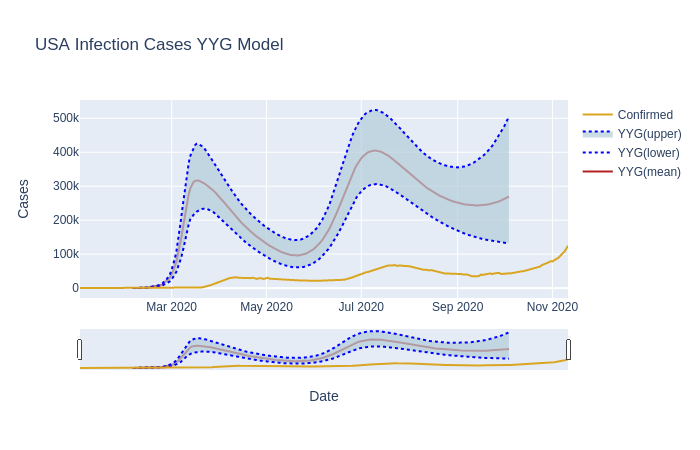

In [219]:
fig8 = go.Figure()
# Create and style traces
fig8.add_trace(go.Scatter(x=usa_yyg['Date'], y=usa_yyg['Daily new estimated infections of COVID-19 (YYG, mean)'], name='YYG(mean)',
                         line=dict(color='firebrick', width=2)))
fig8.add_trace(go.Scatter(x=usa_yyg['Date'], y=usa_yyg['Daily new estimated infections of COVID-19 (YYG, lower)'], name='YYG(lower)',
                         line=dict(color='blue', width=2,dash='dot')))

fig8.add_trace(go.Scatter(x=usa_yyg['Date'], y=usa_yyg['Daily new estimated infections of COVID-19 (YYG, upper)'], name='YYG(upper)',
                         line=dict(color='blue', width=2,dash='dot'),fillcolor="rgba(179,205,217,0.7)", fill = 'tonexty'))
fig8.add_trace(go.Scatter(x=usa_yyg['Date'], y=usa_yyg['Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)'], name='Confirmed',
                         line=dict(color='Goldenrod', width=2)))

# Edit the layout
fig8.update_layout(title='USA Infection Cases YYG Model',
                   xaxis_title='Date',
                   yaxis_title='Cases')

fig8.update_xaxes(rangeslider_visible=True)
fig8.show()

From the graph above we can observe that the confirmed cases is much lower than the estimated infection cases. Also the uncertainty increases as it gets closer to the current date.

### USA's IFR and its Confidence Interval
Now we will calcuate the IFR for USA with the following formula with data obtained form the YYG model.
>$IFR=\frac{Number of deaths }{Number of Infected}* 100$

In [220]:
yyg_IFR=us['total_deaths'].max()/usa_yyg['Daily new estimated infections of COVID-19 (YYG, mean)'].sum()*100

In [221]:
#IFR written with 1 significant figure in uncertainty and value with the same number of decimal places
round(yyg_IFR,1)

0.5

Now we will calculate the error using the upper and lower bounds to find our the confidence interval for the IFR value, this will indicate the level of uncertainty in the estimations.

In [222]:
yyg_IFR_lower=us['total_deaths'].max()/usa_yyg['Daily new estimated infections of COVID-19 (YYG, lower)'].sum()*100

In [223]:
round(yyg_IFR_lower,1)

0.7

In [224]:
yyg_IFR_upper=us['total_deaths'].max()/usa_yyg['Daily new estimated infections of COVID-19 (YYG, upper)'].sum()*100

In [225]:
round(yyg_IFR_upper,1)

0.3

In [226]:
un = round((yyg_IFR_upper+yyg_IFR_lower)/2,1)

In [227]:
from IPython.display import Markdown as md
md("The IFR for United states is {}±{} .".format(round(yyg_IFR,1),round(un,1)))

The IFR for United states is 0.5±0.5 .

This range agrees with the numbers estimated by many researches claiming USA's IFR is approximatly 0.26%. Retrieved from:
https://www.acpjournals.org/doi/10.7326/M20-5352

IFR is written with 1 significant figure in uncertainty and value with the same number of decimal places which is 1 significant figure in this case. The error value calculated equivalent to the IFR, these uncertainty include the variances in the estimation model, errors in data collections etc. 

# Conclusion
United States has seen an increasing trend in its covid confirmed cases, the death cases seems to be stable in comparison to the surging confirmed cases. The female anf male cases are almost the same proportion, indicating no correlation between covid and sex, but this is based on available US data only. Further comparing the results we get, IFR is much lower than CFR. We can conclude that CFR calculated using the confirmed cases overestimates the death rates of COVID. As opposed to IFR can reflect the true estimation of how deadly is covid, which answers our driving question.

Further analysis needs to be conducted on insightful visualisations on error rates (uncertainties) so that it is easy to comprehend. Also to investigate further in the factors causing the uncertainties - e.g. sex, ages and comparisons between different countries to determine uncertainties across countries.